In [1]:
import pandas as pd
import numpy as np
import rpy2.robjects as robjects
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

pandas2ri.activate()

from PyCRO_SL import *
from PyCRO_SL.CRO_SL import CRO_SL
from PyCRO_SL.AbsObjetiveFunc import AbsObjetiveFunc
from PyCRO_SL.SubstrateInt import SubstrateInt
from PyCRO_SL.SubstrateReal import SubstrateReal
import random

In [2]:
class HydroProblem(AbsObjetiveFunc):
    def __init__(self, rscript_name="exec_problem.R", opt="min"):
        # Defining the R script and loading the instance in Python
        r = robjects.r
        r["source"](rscript_name)

        inf_lim = np.array([1e-4, 10, 0, 1e-4, 1e-4, 2, -6])
        sup_lim = np.array([1, 2000, 1, 100, 1, 11, 1])
        self.size = 7

        # Loading the function we have defined in R.
        self.exec_function_r = robjects.globalenv["hydro_prob"]
        super().__init__(self.size, opt, sup_lim, inf_lim)

    def objetive(self, solution):
        metrics = self.exec_function_r(self.model_used, solution)
        if self.metric == "MSE":
            return float(metrics[0])
        elif self.metric == "RMSE":
            return float(metrics[1])
        elif self.metric == "NSE":
            return float(metrics[3])
        elif self.metric == "R2":
            return abs(1 - float(metrics[4]))
        elif self.metric == "KGE":
            return float(metrics[5])

    def random_solution(self):
        return (self.sup_lim - self.inf_lim) * np.random.random(self.size) + self.inf_lim

    def check_bounds(self, solution):
        return solution.clip(self.inf_lim, self.sup_lim)

In [5]:
objfunc = HydroProblem("exec_problem_optim.R")

substrates_real = [
    SubstrateReal("Gauss", {"F": 0.1}),
    SubstrateReal("DE/best/2", {"F": 0.7, "Cr": 0.9}),
    SubstrateReal("BLXalpha", {"Cr": 0.35}),
    SubstrateReal("Firefly", {"a": 0.7, "b": 1, "d": 0.95, "g": 10}),
    SubstrateReal("Perm", {"Cr": 4 / 7}),
]

params = {
    "popSize": 120,
    "rho": 0.6,
    "Fb": 0.98,
    "Fd": 0.15,
    "Pd": 0.99,
    "k": 3,
    "K": 10,
    "group_subs": True,
    "stop_cond": "ngen",
    "time_limit": 400.0,
    "Ngen": 100,
    "Neval": 3e4,
    "fit_target": 1000,
    "verbose": False,
    "v_timer": 1,
    "dynamic": True,
    "dyn_method": "fitness",
    "dyn_metric": "best",
    "dyn_steps": 500,
    "prob_amp": 0.015,
}

c = CRO_SL(objfunc, substrates_real, params)

c.safe_optimize()

...
hello
hello2
hello3


Number of generations: 101
Real time spent: 7100.19547s
CPU time spent: 7100.28177s
Number of fitness evaluations: 8545
	Substrate probability:
		Cauchy:    0.003922
		Cauchy:    0.003922
		Cauchy:    0.984313
		Multipoint:0.003922
		BLXalpha:  0.003922
Best fitness: 0.205098


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


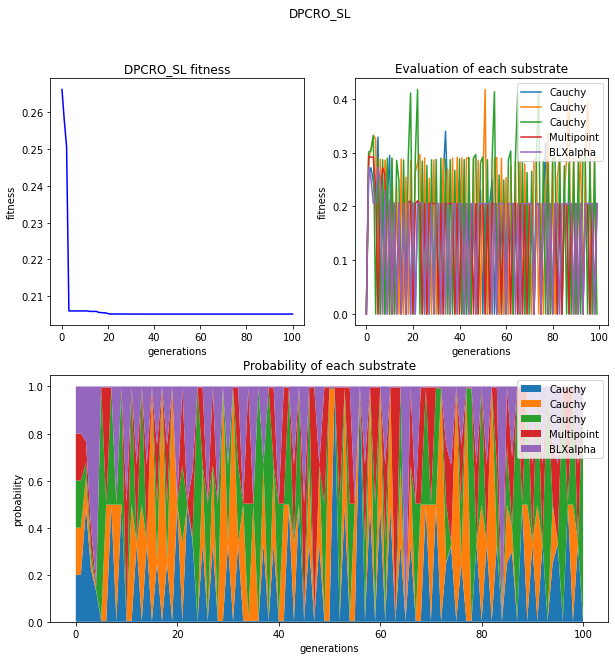

In [ ]:
c.display_report(show_plots=True, save_figure=True, figure_name="config3.eps")
c.save_solution("config3.csv")

In [ ]:
with open("config2.csv", "r") as fc, open("ABDparams.txt", "w") as fr:
    line = fc.readline()
    fr.write(line)

FileNotFoundError: [Errno 2] No such file or directory: 'config2.csv'